- A log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.

- If random variable $X$ is log-normally distributed, then $Y=\ln{X}$ has a normal distribution.

- In other words, if $Y$ has a normal distribution, then $X=\exp{Y}$ has a log-normal distribution.

- A random variable which is log-normally distributed takes only positive real values.

- Given log-normally distributed random variable $X$ and mean $\mu \in (0, +\infty)$ & standard deviation $\sigma > 0$ of the variable's natural logarithm, then log of $X$ is normally distributed.

- $X = e^{\mu + \sigma Z}$, where $Z$ = standard normal variable.

Support: $x \in (0, +\infty)$

- In math, support of a real-valued function $f$ is the subset of the domain containing those elements which are not mapped to zero.

PDF:

$$ f(x) = \frac{1}{x \sigma \sqrt{2 \pi}}
e^{\frac{-(\ln{x} - \mu)^{2}}{2 \sigma^{2}}} $$

- Mean $ = \exp{(\mu + \frac{\sigma^{2}}{2})} $

- Median $ = \exp{(\mu)} $

- Mode $ = \exp{(\mu - \sigma^{2})} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters:
mu = 3.0
sigma = 1.0

In [3]:
print ( np.exp(mu + 0.5*sigma**2) ) #mean
print ( np.exp(mu) ) #median
print ( np.exp(mu - sigma**2) ) #mode

33.11545195869231
20.085536923187668
7.38905609893065


In [4]:
N = 1000000 #10^6
s = np.random.lognormal(mu, sigma, N)
print (s.min(), s.max())

0.181763355948544 1969.2993004848388


In [5]:
UpperLim = np.ceil(s.max()/100)*100    
print (UpperLim)

2000.0


In [6]:
hist, bin_edges = np.histogram(s, bins=500, range=(0, UpperLim), density=True)
bin_width = bin_edges[1] - bin_edges[0]
print (bin_width)

4.0


In [7]:
print ( sum(hist) )
print ( sum(hist)*bin_width ) #this should give 1.

0.2500000000000001
1.0000000000000004


In [8]:
x = np.linspace(s.min(), s.max(), 10001)
f = 1./(x * sigma * np.sqrt(2*np.pi)) * \
np.exp(-( (np.log(x) - mu)**2 ) / (2*sigma**2))

In [9]:
x[0], x[1]

(0.181763355948544, 0.37867510966143303)

In [10]:
# Integrate f under the curve to get 1, bcoz it is normalized.
MySum = 0
for ii in range(1, len(x)-1):
    MySum += 2*f[ii]
MySum = MySum + f[0] + f[-1]
MySum = 0.5 * (x[1]-x[0]) * MySum
print (MySum)

0.9999943174064027


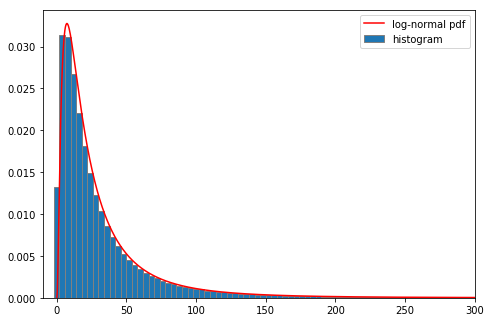

In [11]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(bin_edges[:-1], hist,
       width=bin_width, edgecolor="grey",
       label="histogram")

ax.plot(x, f, "r-", label="log-normal pdf")

ax.set_xlim([-10, 300])

plt.legend()
plt.show()

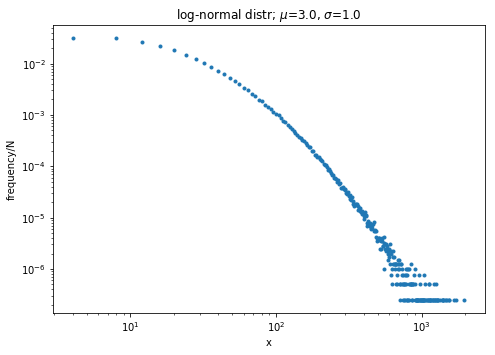

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(bin_edges[:-1], hist, ".")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("x")
ax.set_ylabel("frequency/N")
ax.set_title(r"log-normal distr; $\mu$={}, $\sigma$={}".format(mu, sigma))

plt.show()

^This looks like a power law can be fitted to it, ie a linear line can be fitted to the tail, indicating that the distribution follows a power law - which is not true, since the distribution follows log-normal.